# Introduction: basic Julia usage and plotting

lalala. First course of a super cool lecture series!

# Basics of Julia

In this block we will overview basic Julia syntax, data structures, iteration, and using functions. The block assumes familiarity with programming, in the sense of reasoning about code, and also familiarity with the concept of an interactive development environment (or dynamic programming languages) where a program may be written and executed interactively line-by-line. The block doesn't assume any familiarity with a specific programming language however.

_This block doesn't cover installing Julia! Please ensure you have done so before going through here! We typically do these courses on a Jupyter environment run in VSCode using the Julia extension. To achieve this environment, follow the installation instructions in [this page](https://www.julia-vscode.org/docs/dev/gettingstarted/#Installation-and-Configuration). After installation you can import this downloaded Jupyter notebook by opening the command launch in VSCode (Ctrl+Shift+P) and then selecting "Jupyter: Import new notebook"._

## Basic syntax


### Assignment

Assingment of variables in Julia is done with the `=` sign.

In [1]:
x = 1

1

In [2]:
x

1

You can assign *anything* to a variable binding. This includes functions, modules, data types, or whatever you can come up with.

Variable names can include practically any Unicode character. Additionally, most Julia editing environments offer "LaTeX Completion". Pressing e.g. `\delta` and then TAB will create the corresponding Unicode character using the LaTeX syntax.

In [3]:
δ = 4 # type `\delta` and then press tab!

4

You can assign multiple variables to multiple values using commas.

In [4]:
😺, 😀, 😞 = 1, 0, -1

(1, 0, -1)

In [5]:
😺 + 😞 == 😀 # legitimate code. Not good for readability though ;)

true

Strings are created between double quotes `"` while the single quotes `'` are used for characters only.

In [6]:
안녕하세요 = "人人生而自由，在尊严和权利上一律平等。"

"人人生而自由，在尊严和权利上一律平等。"

In [7]:
char = '안' # for characters, Julia prints their Unicode information

'안': Unicode U+C548 (category Lo: Letter, other)

Since assignement returns the value, by default this value is printed. This is **AMAZING**, but you can also silence printing by adding `;` to the end of the expression:

In [8]:
x = 3;

Lastly, you can interpolate any expression into a string using `$(expression)`

In [9]:
"the value of the cat face (😺) is $(😺)"

"the value of the cat face (😺) is 1"

In [10]:
"I am doing math inside a string: $(π^2 - x)"

"I am doing math inside a string: 6.869604401089358"

### Math operations

Basic math operators are `+, -, *, /` and `^` for power.

In [11]:
x = 3
y = x^2.6

17.398638404385867

Most julia operators have their `=` version, which updates something with its own value

In [12]:
x += 3 # x = x + 3
x -= 3
x *=2
x /= 2

3.0

Literal numbers can multiply anything without having to put `*` inbetween, as long as the number is on the left side:

In [13]:
5x - 12.54y * 1.2e-5x

14.992145558678724

## Basic collection datastructures

Indexing a collection (like an array or a dictionary) in Julia is done with brackets: `collection[index]`.

In **ordered collections** (where the elements are specified by their order rather than some key), indexing is done using the positive integers. This means that **indexing in Julia starts from 1**. Which is exceptionaly good, because the index matches the element order: the 5th element has index 5.


### Tuples
Tuples are **immutable ordered collections** of elements of any type. They are most useful when the elements are not of the same type with each other and are intended only for small collections.

Syntax:

```julia
(item1, item2, ...)
```

In [14]:
myfavoritethings = ("purple", '🥁', π)

("purple", '🥁', π)

In [15]:
myfavoritethings[1]

"purple"

You can extract multiple values into variables from any collection using commas.

In [16]:
a, b, c = myfavoritethings
c

π = 3.1415926535897...

The type of the tuple is the type of its constituents.

In [17]:
typeof(myfavoritethings)

Tuple{String, Char, Irrational{:π}}

### Dictionaries
Dictionaries are **unordered mutable collections** of pairs key-value. They are intended for sets of relational data, and typically you want the data to be of the same type.

Syntax:
```julia
Dict(key1 => value1, key2 => value2, ...)
```

A good example of a dictionary is a contacts list, where we associate names with phone numbers.

In [18]:
myphonebook = Dict("Jenny" => "867-5309", "Ghostbusters" => "555-2368")

Dict{String, String} with 2 entries:
  "Jenny"        => "867-5309"
  "Ghostbusters" => "555-2368"

In [19]:
myphonebook["Jenny"]

"867-5309"

New entries can be added to the above dictionary, because it is mutable *(I will talk in more detail about mutability in a moment, but for now mutable means that "you can change its values without creating a copy or a new collection")*. The key of the entry must be of type `String` and the value of the entry must be of type `String`, because these are the types in the original dictionary.

In [20]:
myphonebook["Buzz Lightyear"] = "∞ and beyond"

myphonebook # this displays the phonebook

Dict{String, String} with 3 entries:
  "Jenny"          => "867-5309"
  "Buzz Lightyear" => "∞ and beyond"
  "Ghostbusters"   => "555-2368"

Dictionaries have a specific type for keys and values. First type is the type of key, second is the type of value.

In [21]:
typeof(myphonebook)

Dict{String, String}

### Named tuples

_(optional subsection that is typically skipped)_

These are exactly like tuples but also assign a name to each variable they contain.
Hence, they are an **immutable collection of ordered _and_ named elements**. 
They rest between the `Tuple` and `Dict` type in their use.

Their syntax is:
```julia
(key1 = val1, key2 = val2, ...)
```
For example:

In [22]:
nt = (x = 5, y = "str", z = 5/3)

(x = 5, y = "str", z = 1.6666666666666667)

These objects can be accessed with `[1]` like normal tuples, but also with the syntax `.key`:

In [23]:
nt[1]

5

In [24]:
nt.x # equivalent with nt[:x]

5

(named tuples are useful to know, because keyword arguments to functions are essentially named tuples)

### Arrays

The standard Julia `Array` is a **mutable and ordered collection of items of the same type**.
The dimensionality of the Julia array is important. A `Matrix` is an array of dimension 2. A `Vector` is an array of dimension 1. The *element type* of what an array contains is irrelevant to its dimension!

**i.e. a Vector of Vectors of Numbers and a Matrix of Numbers are two totally different things!**

The syntax to make a vector is enclosing elements in brackets:

In [25]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [26]:
mixture = [1, 1, 2, 3, "Ted", "Robyn"]

6-element Vector{Any}:
 1
 1
 2
 3
  "Ted"
  "Robyn"

As mentioned, the type of the elements of an array must be the same. Yet above we mix numbers with strings! I wasn't lying though; the above vector is an **unoptimized** version that can hold **any** thing. You can see this in the "type" of the vector, `Vector{Any}`.

Arrays of other data structures, e.g. vectors or dictionaries, or anything, as well as multi-dimensional arrays are possible:

In [27]:
vec_vec_num = [[1, 2, 3], [4, 5], [6, 7, 8, 9]] # vector of vectors, which is NOT a matrix

3-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5]
 [6, 7, 8, 9]

If you want to make a matrix, two ways are the most common: (1) specify each entry one by one

In [28]:
matrix = [1 2 3; # elements in same row separated by space
          4 5 6; # semicolon means "go to next row"
          7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

or (2), you use a function that initializes a matrix. E.g. `rand(n, m)` will create an `n×m` matrix with uniformly random numbers

In [29]:
R = rand(4, 3)

4×3 Matrix{Float64}:
 0.97005   0.154155  0.595922
 0.667058  0.523666  0.855066
 0.789979  0.500103  0.628766
 0.513836  0.486815  0.566157

In [30]:
R[1, 2] # two dimensional indexing

0.15415505417532982

Since arrays are mutable we can change their entries _in-place_ (i.e., without creating a new array):

In [31]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]
fibonacci[1] = 15
fibonacci

7-element Vector{Int64}:
 15
  1
  2
  3
  5
  8
 13

We can add or remove elements from any mutable collection with functions like `push!, pop!, delete!`. We'll cover functions in more detail in a moment!

In [32]:
push!(fibonacci, 21)

8-element Vector{Int64}:
 15
  1
  2
  3
  5
  8
 13
 21

Lastly, for multidimension arrays, the `:` symbol is useful, which means to "select all elements in this dimension".

In [33]:
x = rand(3, 3)

3×3 Matrix{Float64}:
 0.917582     0.918776  0.568814
 0.155127     0.201159  0.461812
 0.000421695  0.419207  0.476069

In [34]:
x[:, 1] # it means to select the first column

3-element Vector{Float64}:
 0.9175823650018751
 0.1551268760251442
 0.0004216954270775952

### Ranges
Ranges are useful shorthand notations that define a "vector" (one dimensional array) with equi-spaced entries. They are created with the following syntax:
```julia
start:stop # mainly for integers
start:step:stop
range(start, stop, length)
range(start, stop; step = ...)
```

In [35]:
r = 0:0.01:5

0.0:0.01:5.0

Ranges always include the first element and step until they _do not exceed_ the ending element. If possible, they include the stop element (as above).

In [36]:
r[end] # use `end` as index for the final element

5.0

Ranges are not unique to numeric data, and can be used with anything that extends their interface, e.g.

In [37]:
letterrange = 'a':'z'

'a':1:'z'

As ranges are printed in this short form, to see all their elements you can use `collect`, to transform the range into a `Vector`.

In [38]:
collect(letterrange)

26-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)
 'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)
 'f': ASCII/Unicode U+0066 (category Ll: Letter, lowercase)
 'g': ASCII/Unicode U+0067 (category Ll: Letter, lowercase)
 'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)
 'i': ASCII/Unicode U+0069 (category Ll: Letter, lowercase)
 'j': ASCII/Unicode U+006A (category Ll: Letter, lowercase)
 ⋮
 'r': ASCII/Unicode U+0072 (category Ll: Letter, lowercase)
 's': ASCII/Unicode U+0073 (category Ll: Letter, lowercase)
 't': ASCII/Unicode U+0074 (category Ll: Letter, lowercase)
 'u': ASCII/Unicode U+0075 (category Ll: Letter, lowercase)
 'v': ASCII/Unicode U+0076 (category Ll: Letter, lowercase)
 'w': ASCII/Unicode U+0077 (category Ll: Letter, lowercase)
 'x': ASCII/

Ranges are cool because they **do not store all elements in memory** like `Vector`s. Instead they produce the elements on the fly when necessary, and therefore are in general preferred over `Vector`s if the data is equi-spaced. 

Lastly, ranges are typically used to index into arrays. One can type `A[1:3]` to get the first 3 elements of `A`, or `A[end-2:end]` to get the last three elements of `A`. If `A` is multidimensional, the same type of indexing can be done for any dimension:

In [39]:
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.0830695  0.180757   0.424285  0.626558
 0.444364   0.566914   0.782439  0.577076
 0.499294   0.0441244  0.129111  0.862947
 0.724958   0.322375   0.548087  0.00187835

In [40]:
A[1:3, 1]

3-element Vector{Float64}:
 0.08306950545575376
 0.44436359183311047
 0.4992935423430571

In [41]:
A[1:3, 1:3]

3×3 Matrix{Float64}:
 0.0830695  0.180757   0.424285
 0.444364   0.566914   0.782439
 0.499294   0.0441244  0.129111

## Iteration
Iteration in Julia is high-level. This means that not only it has an intuitive and simple syntax, but also iteration works with anything that can be iterated. Iteration can also be extended (more on that later).


### `for` loops

A `for` loop iterates over a container and executes a piece of code, until the iteration has gone through all the elements of the container. The syntax for a `for` loop is

```julia
for *var(s)* in *loop iterable*
    *loop body*
end
```

*you will notice that all Julia code-blocks end with `end`*

In [42]:
for n in 1:5
    println(n)
end

1
2
3
4
5


The nature of the iterating variable depends on what the iterating container has. For example, when iterating over a dictionary one iterates over pairs of key-value.

In [43]:
for pair in myphonebook # pair in myphonebook
    println(pair)
end

"Jenny" => "867-5309"
"Buzz Lightyear" => "∞ and beyond"
"Ghostbusters" => "555-2368"


Most of the time in such a scenario however, the variables that compose the iterable are decomposed directly after the `for` keyword, which also makes the code cleaner. For example:

In [44]:
for (key, val) in myphonebook # pair in myphonebook
    println("The number of $key is $val")
end

The number of Jenny is 867-5309
The number of Buzz Lightyear is ∞ and beyond
The number of Ghostbusters is 555-2368


In the context of `for`  loops, the `enumerate` iterator is often useful. It takes in an iterable and returns pairs of the index and the iterable value. 

In [45]:
for (i, v) in enumerate(rand(3))
    println("value of index $i: $v")
end

value of index 1: 0.13858283482249123
value of index 2: 0.4247647231664763
value of index 3: 0.27594056496828134


### `while` loops

A `while` loop executes a code block until a boolean condition check (that happens at the start of the block) becomes `false`. Then the loop terminates (without executing the block again). The syntax for a standard `while` loop is

```julia
while *condition*
    *loop body*
end
```

In [46]:
n = 0
while n < 5
    n += 1
    println(n)
end

1
2
3
4
5



## Conditionals

Conditionals execute a specific code block depending on what is the outcome of a given boolean check. 
The  `&, |` are the boolean `and, or` operators.

### `if` block

In Julia, the syntax

```julia
if *condition 1*
    *option 1*
elseif *condition 2*
    *option 2*
else
    *option 3*
end
```

evaluates the conditions sequentially and executes the code-block of the first true condition.

In [47]:
x, y = 5, 6
if x > y
    x
else
    y
end

6

### Ternary operator

The ternary operator (named for having three arguments) is a convenience syntax for small `if` blocks with only two clauses. 

Specifically, the syntax

```julia
condition ? if_true : if_false
```

is syntactically equivalent to

```julia
if condition
    if_true
else
    if_false
end
```

For example

In [48]:
5 == 5.0 ? "yes" : "no"

"yes"

### `break` and `continue`
The keywords `continue` and `break` are often used with conditionals to skip an iteration or completely stop the iteration code block.

In [49]:
N = 1:100
for n in N
    isodd(n) && continue
    println(n)
    n > 10 && break
end

2
4
6
8
10
12


### List comprehension
The list comprenhension syntax 
```julia
[expression(a) for a in collection if condition(a)]
```
is available as a convenience way to make a `Vector`. The `if` part is optional.

In [50]:
[a^2 for a in 1:10 if iseven(a)]

5-element Vector{Int64}:
   4
  16
  36
  64
 100

## Functions
Functions are the bread and butter of Julia, which heavily supports functional programming.


### Function decleration

Functions are declared with two ways. First, the verbose

In [51]:
function f(x)
    x^2      # all Julia code blocks by default 
             # return the last executed expression
end

function f(x)
    return x^2 # but it's recommende to use `return` for clarity
end

f (generic function with 1 method)

Or, you can define functions with the short form (best used for functions that only take up a single line of code)

In [52]:
f(x) = x^2  # equivalent with above

f (generic function with 1 method)

Functions are called using their name and parenthesis `()` enclosing the calling arguments:

In [53]:
f(5)

25

Functions in Julia support optional positional arguments, as well as keyword arguments. The **positional** arguments are **always given by their order**, while **keyword** arguments are **always given by their keyword**. Keyword arguments are all the arguments defined in a function after the symbol `;`. Example:

In [54]:
function g(x, y = 5; z = 2)
    return x*z*y
end

g (generic function with 2 methods)

In [55]:
g(5) # give x. default y, z

50

In [56]:
g(5, 3) # give x, y. default z

30

In [57]:
g(5; z = 3) # give x, z. default y

75

In [58]:
g(2, 4; z = 1.5) # give everything

12.0

In [59]:
g(2, 4, 2) # keyword arguments can't be specified by position

MethodError: MethodError: no method matching g(::Int64, ::Int64, ::Int64)
Closest candidates are:
  g(::Any, ::Any; z) at c:\Users\datse\Documents\Projects\NonlinearDynamicsComplexSystemsCourses\basin_Julia_usage_and_plotting.ipynb:1
  g(::Any) at c:\Users\datse\Documents\Projects\NonlinearDynamicsComplexSystemsCourses\basin_Julia_usage_and_plotting.ipynb:1

### Duck-typing
Julia supports the "duck typing" approach. Simply put, functions work on whatever input makes sense given their operations. This can be restricted if need be. 

In our example with `g`, anything that supports the function `*` will work.

In [60]:
A = rand(3, 3)

3×3 Matrix{Float64}:
 0.86407   0.961749  0.280971
 0.433838  0.540741  0.466271
 0.645059  0.52427   0.564463

In [61]:
g(A) # matrix * number * number

3×3 Matrix{Float64}:
 8.6407   9.61749  2.80971
 4.33838  5.40741  4.66271
 6.45059  5.2427   5.64463

In [62]:
g(A, A; z = A) # matrix * matrix * matrix

3×3 Matrix{Float64}:
 2.36049  2.54942  1.55627
 1.61147  1.72541  1.0603
 1.99341  2.144    1.30239

In [63]:
g("string", "string"; z = "string") # * is string concatenation

"stringstringstring"

In [64]:
g("string", 5)

MethodError: MethodError: no method matching *(::String, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:591
  *(!Matched::T, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:88
  *(::Union{AbstractChar, AbstractString}, !Matched::Union{AbstractChar, AbstractString}...) at strings/basic.jl:260
  ...

Now we got an error because the operation `String*Number` is not supported by default in Julia.

###  Passing by reference: mutating vs. non-mutating functions

You can divide Julia variables into two categories: **mutable** and **immutable**. Mutable means that the values of your data can be changed in-place, i.e. literally in the place in memory the variable is stored in the computer. Immutable data cannot be changed after creation, and thus the only way to change part of immutable data is to actually make a brand new immutable object from scratch. Use `isimmutable(v)` to check if value `v` is immutable or not.

For example, `Vector`s are mutable in Julia:

In [65]:
x = [5, 5, 5]
x[1] = 6 # change first entry of x
x

3-element Vector{Int64}:
 6
 5
 5

But e.g. `Tuple`s are immutable:

In [66]:
x = (5, 5, 5)
x[1] = 6

MethodError: MethodError: no method matching setindex!(::Tuple{Int64, Int64, Int64}, ::Int64, ::Int64)

In [67]:
x = (6, 5, 5)

(6, 5, 5)

Julia **passes values by reference**. This means that if a mutable object is given to a function, and this object is mutated inside the function, the final result is kept at the passed object. E.g.:

In [68]:
function add3!(x)
    x[1] += 3
    return x
end

x = [5, 5, 5]
add3!(x)
x

3-element Vector{Int64}:
 8
 5
 5

**By convention**, functions with name ending in `!` alter their (mutable) arguments and functions lacking `!` do not. Typically the first argument of a function that ends in `!` is mutated.

For example, let's look at the difference between `sort` and `sort!`.

In [69]:
v = [3, 5, 2]

3-element Vector{Int64}:
 3
 5
 2

In [70]:
sort(v)

3-element Vector{Int64}:
 2
 3
 5

In [71]:
v

3-element Vector{Int64}:
 3
 5
 2

`sort(v)` returns a sorted array that contains the same elements as `v`, but `v` is left unchanged. <br><br>

On the other hand, when we run `sort!(v)`, the contents of v are sorted within the array `v`.

In [72]:
sort!(v)

3-element Vector{Int64}:
 2
 3
 5

In [73]:
v

3-element Vector{Int64}:
 2
 3
 5

### Functions as arguments

Functions, like literally anything else in Julia, are objects that can be passed around like any other value. Including giving them as arguments to other functions. The most typical application of this is the `map` function, that maps its first argument (which is itself a function) over the elements of second argument.

In [109]:
square(x) = x^2
x = [1, 2, 3]
square_of_x = map(square, x)

3-element Vector{Int64}:
 1
 4
 9

The second most common application of this is defining dynamical systems or agent based models by providing the functions that govern the evolution rule(s) to a system constructor. This however will be covered in later tutorials!

In the context of "functions as arguments" one typically also encounters _anonymous functions_ i.e., functions that are created on the spot without a given name. For example, computing the cube of `x` without defining a "proper" function looks like:

In [22]:
x = [1, 2, 3]
cube_of_x = map(x -> x^3, x)

3-element Vector{Int64}:
  1
  8
 27

where we use the syntax `(args...) -> expression_with_args` which defines an anonymous function. E.g.,

In [25]:
(x, y) -> (x & y | false) / 22

#15 (generic function with 1 method)

### The help system

Typing `?` followed by a function (or type) name will display its documentation string. Alternatively you can type `@doc` and then the function name.

## Broadcasting

_probably skipped for the sake of time_


Broadcasting is a convenient syntax for applying any function over the elements of an iterable input. I.e., the result is a new iterable whose elements is the function application of the elements of the input.

Broadcasting is done via the simple syntax of adding a dot `.` before the parenthesis in the function call: `g.(x)`.

In [75]:
h(x, y = 1) = x + y

h (generic function with 2 methods)

In [76]:
x = [1, 2, 3]
h.(x) # without 2nd argument, `h` is just `x + 1`

3-element Vector{Int64}:
 2
 3
 4

In [77]:
y = [1, 2, 3]
h.(x, y) # each element of `x` is added to the corresponding element of `y`

3-element Vector{Int64}:
 2
 4
 6

Let's now apply it to a vector `x`

In [78]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [79]:
h.(x)

3-element Vector{Int64}:
 2
 3
 4

Broadcasting can be useful when the number of operations is small and one can easily reason about the way the operations would be broadcasted across input(s). 

A typical example of broadcasting is to make an exponential range, which doesn't have a pre-made function in Julia:

In [80]:
exp_range = 10.0 .^ (-3:3)

7-element Vector{Float64}:
    0.001
    0.010000000000000002
    0.1
    1.0
   10.0
  100.0
 1000.0

*(notice that for infix operators (like `+, -`) the `.` is put before the operator)*

# Exercises - basics


## Babylonian square root
To get the square root of $y$ Babylonians used the algorithm $x_{n+1} = \frac{1}{2}(x_n + \frac{y}{x_n})$ iteratively starting from some value $x_0$ to converge to $x_n \to \sqrt{y}$ as $n\to \infty$. Implement this algortihm in a function `babylonian(y, ε)` that takes some convergence tolerance `ε` to compare with the built-in `sqrt(y)`. The function should return the steps it took to reach the square root value within given tolerance.

_Hint: for this exercise you only need a `while` code block without any other code structures such as `for, if, ...`._


## Counting nucleotides
Create a function that given a DNA strand (as a `String`, e.g. `"AGAGAGATCCCTTA"`) it counts how much of each nucleotide (A G T or C) is present in the strand and returns the result as a dictionary mapping the nucleotides to their counts. The function should throw an error (using the `error` function) if an invalid nucleotide is encountered. Test your result with `"ATATATAGGCCAX"` and `"ATATATAGGCCAA"`.

*Hint: Strings are iterables! They iterate over the characters they contain.*

## Fibonacci numbers
Using recursion (a function that calls itself) create a function that given an integer `n` it returns the `n`-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number). Apply it using `map` to the range `1:8` to get the result `[1,1,2,3,5,8,13]`.

---

# Basic plotting with Makie.jl

This block serves as a tini-tiny introduction to plotting in Julia using [Makie](https://docs.makie.org/stable/), which has to be the best plotting framework out there _in any programming language_ (personal opinion).

Makie offers several plotting backends, but for the purpose of this tutorial we will use its Cairo backend, focused on 2D publication quality graphics.

In [93]:
using CairoMakie

## Initializing plots

_before going through the plotting tutorial we'll quickly change the default figure and size for easier visualization in a zoomed-in Jupyter notebook; themeing will not actually be discussed in this brief introduction_

In [17]:
update_theme!(resolution = (500, 300), fontsize = 16)

Alright, the most straight-forward usage of Makie is to directly call one of the plotting functions, like `lines, scatter, barplot, ...` giving in the x and y coordinates of data to be plotted.

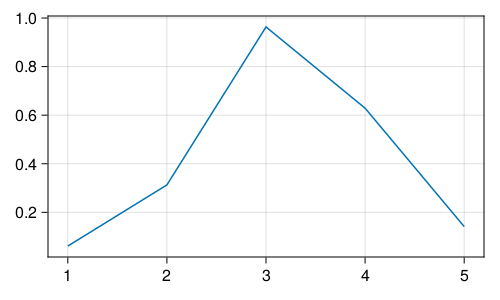

In [95]:
x = 1:5
y = rand(5)
fig, ax, plot_object = lines(x, y)

These plotting functions return three values. `fig` is a `Figure` object, which is the overarching figure that everything else is contained in. `ax` is an `Axis` object, which is a window with coordinates, labels, tickmarks, etc., in which data are visualized. The third output is the specific plot object (here a `Lines` object) for which we do not care about at the moment.

In any case, this all means that when we called `lines(...)` the function did a lot of things: it initialized a figure, it initialized an axis in that figure, and then line-plotted some data. This also means that `lines` and similar functions never update existing plots (which is contrary to the default behavior of e.g. the Python library `matplotlib`):

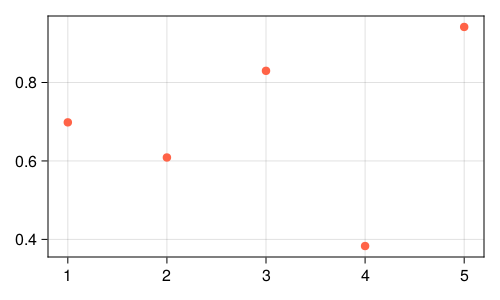

In [96]:
z = rand(5)
scatter(x, z; color = :tomato) # makes a new plot!

To update an existing plot, you need to call the **in-place**, or **mutating**, version of the plotting functions, i.e., the version ending in `!`, giving it the axis to plot in (if not given, the last-used axis is used)

In [97]:
fig, ax, plot_object = lines(x, y)
scatter!(ax, x, z; color = :tomato)

Scatter{Tuple{Vector{Point{2, Float32}}}}

Ops!? what happened here? Why is there no plot? It's because the return value of `scatter!` isn't a figure, but rather just the plot object, since `scatter!` doesn't initialize a figure. We need to explicitly return the figure as the return value of the code block for it to be displayed:

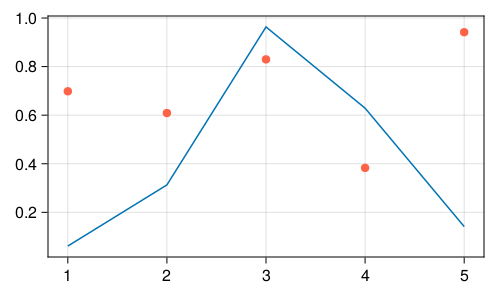

In [98]:
fig

We won't really get into too much detail of the options each plotting function has; they are several dozens, line width, marker style, size, color, fill, and many, many others. They are provided as **keyword arguments** to the plotting functions, e.g., `lines(x, y; color = "purple", linewidth = 2)`. Best to check the online documentation of Makie, or the docstring of the functions, for details on all these options.

What is important to know however, is that all of these options can be vectors, just like the input data. E.g., if you'd like each marker to have a different size, you'd just pass the vector of sizes as the `markersize` attribute (and similarly with color, width, and everything else).

In [1]:
scatter(x, z; 
    markersize = 100z, color = y, colormap = "thermal", 
    marker = ['a', '♠', '⊚', :rect, :circle]
)

UndefVarError: UndefVarError: z not defined

## Layouting axes in figures

One of the strongest features of Makie is its layouting system, that allows you to create sub-panels of figures with as much ease as it is saying where an axis should be in normal English.

To add an axis to a figure, you simply initialize the axis at the expected location using the intuitive **matrix indexing syntax**:

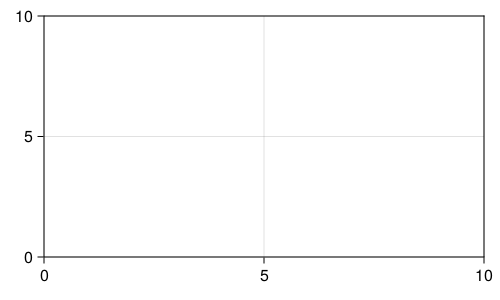

In [100]:
fig = Figure() # initialize a figure with default settings
# assign an Axis to `fig[1,1]` but also keep track of it in a variable!
ax1 = fig[1,1] = Axis(fig)
# alternative syntax to the above is:
# `ax1 = Axis(fig[1,1])`
# i.e., give the location of the axis directly in the `Axis` constructor!
fig # don't forget to return the figure for it to be plotted!

If you want to add more axis to arbitrary locations, you once again use the `fig[row, col]` indexing system, imagining the figure to be a "matrix of axes" and adding an axis at the given row and column.

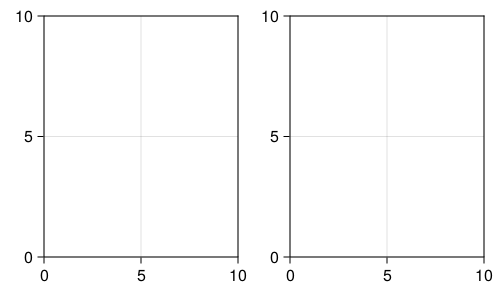

In [101]:
ax2 = fig[1,2] = Axis(fig)
fig

Makie's automatic layouting capabilities make everything fit and be the correct size given the figure size constrain!

Furthermore, they understand the dimensional extent of the "matrix of axis" even without it being yet full of axes:

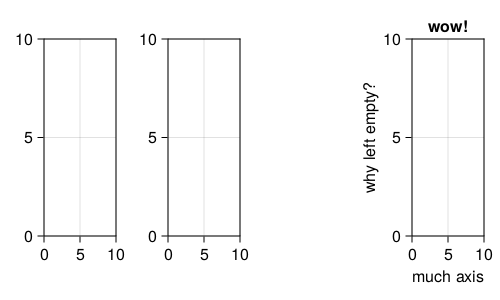

In [102]:
ax4 = fig[1,4] = Axis(fig;
    # This is the way to adjust axis properties during creation:
    title = "wow!",
    xlabel = "much axis",
    ylabel = "why left empty?"
)
fig

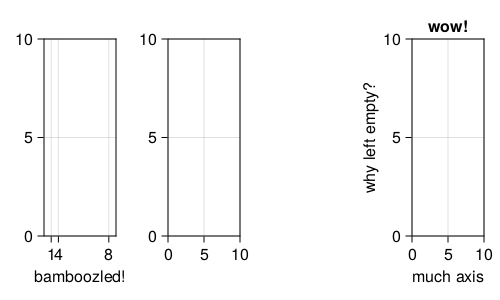

In [103]:
# and this way you adjust axis properties after creation:
ax1.xticks = ([1,2,9], ["1", "4", "8"]) # ticks and their labels
ax1.xlabel = "bamboozled!"
fig

Not only that, but just like normal matrices, one could utilize the syntax `fig[col, row]` using _ranges_, such as `1:2`. For example, here is a case of using ranges to access multiple rows or columns: 

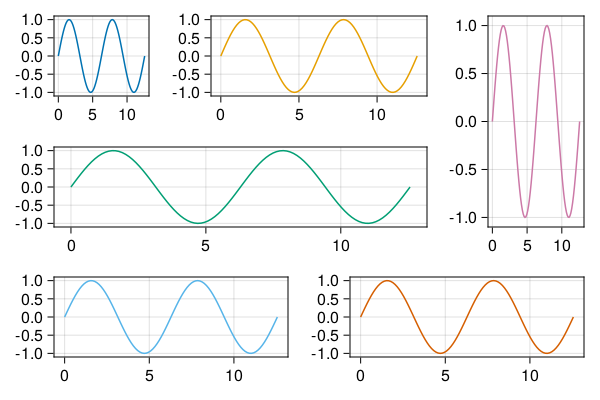

In [104]:
x = range(0, 4π; length = 100)
y = map(sin, x) # or `sin.(x)` or `[sin(a) for a in x]`

fig = Figure(resolution = (600, 400))

# notice that we can call plotting functions directly on figure indices
# if we do not care about storing the created axes for later use!
# (we therefore use the non-`!` version, so that an axes is created)
lines(fig[1, 1], x, y, color = Cycled(1))
lines(fig[1, 2:3], x, y, color = Cycled(2))
lines(fig[2, 1:3], x, y, color = Cycled(3))
lines(fig[1:2, 4], x, y, color = Cycled(4))

# and indices can be arbitrarily nested!
lines(fig[3, :][1, 1], x, y, color = Cycled(5))
lines(fig[3, :][1, 2], x, y, color = Cycled(6))

fig

## Legends and colorbars

The `Axis` structure we have encountered above is a `Block` in the context of Makie. Two more `Block`s that are typically useful in scientific visualizations are the `Legend` and the `Colorbar`. Just like an `Axis` they could be placed arbitrarily and anywhere in a figure, even on top of existing axes.

### Legend

Legend has a simple automated way of being created.
You can assign a label to each plotted element of an axes by providing a value to the keyword `label`.

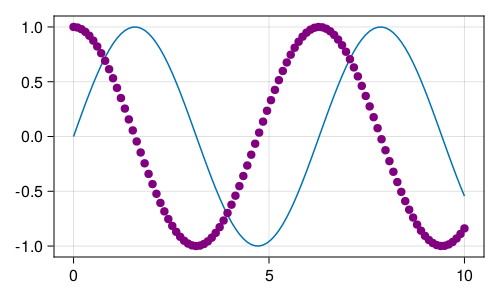

In [105]:
x = range(0, 10; length = 20)
lines(x, sin; label = "sin")  # makes a figure
scatter!(x, cos; label = "cos", color = "purple") # uses last-used figure
current_figure() # return (and hence display) last-used figure

To add an axis that automatically displays the labels we created, we use `axislegend`

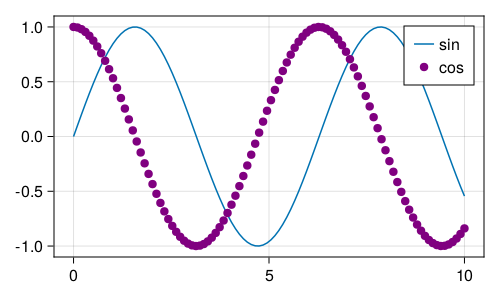

In [106]:
axislegend() # first argument is the axis to use. Defaults to last-used axis.
current_figure()

Of course, sometimes the manual creation and placement of a legend is necessary. In such a case, one collects the plotted objects that we haven't cared about so far, and gives them to a `Legend` object:

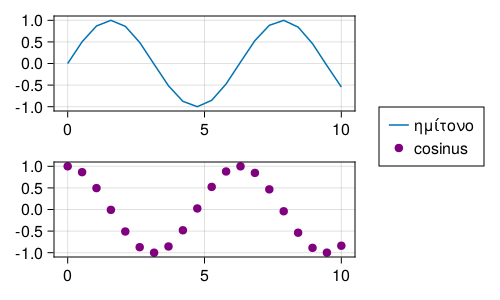

In [21]:
fig = Figure()
x = range(0, 10; length = 20)
ax1, li1 = lines(fig[1, 1], x, sin)
ax2, sc2 = scatter(fig[2, 1], x, cos; color = "purple")
Legend(fig[1:2, 2], [li1, sc2], ["ημίτονο", "cosinus"])
fig

### Colorbar

The Colorbar works in a very similar way, however it doesn't have a convenience function like `axislegend()`. We just need to create a Colorbar giving it a position in the figure, and a plot object to utilize for the color map and color ranges. In this example this plot object is a simple heatmap.

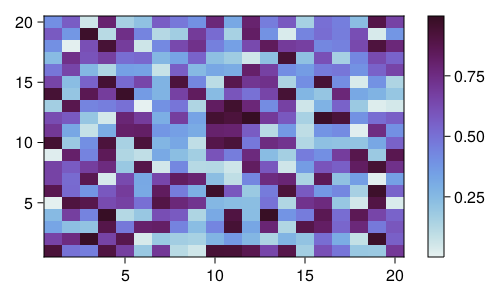

In [108]:
fig, ax, hm = heatmap(rand(20, 20); colormap = "dense")
Colorbar(fig[1, 2], hm) # obtains color map and color range from `hm`
fig

Just like the case of `Legend`, manual colorbars can be created as well. This is typically useful in differently-colored scatter plots and other various statistical analyses. In principle, to create a colorbar you just need to provide it with a colormap, a color-range, and optionally some ticks. For example

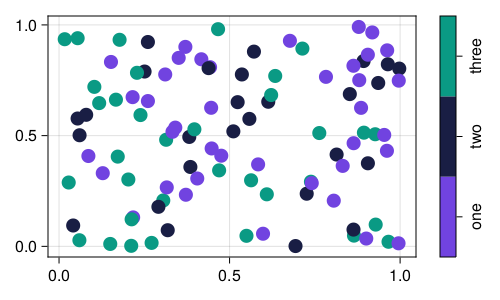

In [20]:
x = rand(100)
y = rand(100)
z = rand(1:3, 100) # random numbers, but chosen from `1, 2, 3`
colors = ["#7143E0", "#191E44", "#0A9A84"]
cmap = cgrad(colors; categorical = true) # makes a color gradient, or color map
# scatter points with random colors from above three
fig, ax = scatter(x, y; color = z, colormap = cmap, markersize = 20)
# add a categorical colorbar with three colors and centered labels
cbar = fig[1, 2] = Colorbar(fig; 
    colormap = cmap, colorrange = (0.5, 3.5),
    ticks = ([1, 2, 3], ["one", "two", "three"]),
    ticklabelrotation = π/2,
)
fig

## Learning more about Makie

Makie is the best the strongest the most amazing plotting framework (personal opinion). In this tini-tiny block we've only looked at a small subset of Makie's functionality. We haven't even touched the strongest feature of Makie, which is interactive visualizations and animations! In any case, you can learn more about Makie in the online documentation. For example:

- You can read about the different available plotting functions with visual examples visit the [Plotting Functions](https://docs.makie.org/stable/examples/plotting_functions/index.html#plotting_functions) section.

- If you want to learn more about making complex figures with nested sublayouts, have a look at the [Layout Tutorial](https://docs.makie.org/stable/tutorials/layout-tutorial/index.html#layout_tutorial) section.

- If you're interested in creating interactive visualizations that use Makie's special `Observables` workflow, this is explained in more detail in the [Observables & Interaction](https://docs.makie.org/stable/documentation/nodes/index.html#observables_interaction) section.

- Lastly, see the [Animations](https://docs.makie.org/stable/documentation/animation/index.html#animations) section for making animated movies.

# Exercises - plotting

lalala



# Basic performance considerations

## Basics of the Types

Everything that exists in Julia has a certain **Type**. (e.g. numbers can be integers, floats, rationals). This "type system" is instrumental for the inner workings of Julia, is mainly what enables Julia to have performance matching static languages like C, and enables **Multiple Dispatch**, one of Julia's greatest features. While in this block we won't go through multiple dispatch it is important be aware and accustomed with the type system early on, because it has major influence on performance.

To find the type of a thing in Julia you simply use `typeof(thing)`:

In [ ]:
x = 3
typeof(x)

Int64

In [ ]:
typeof(1.5)

Float64

In [ ]:
typeof("asdf")

String

## Type stability

Julia matches the performance of C/Fortran not because of better hardware or better compilers than Python has, but because of design. Julia is interactive like Python, but it is not an interpreted language, it is a **compiled** one. This means that **every function call in Julia first gets compiled, based on the exact input types**. Then it is executed.

*(this compilation only happens once for each unique combination of input types)*

When the compiler compiles a function, these types of every variable can be tracked throughout the function and all datastructures are mapped uniquely and deterministically all the way from input to output. This allows the compiler to make all the optimizations that e.g. the compilation of a C language code would do. And this (in a nutshell) is what results in the same performance as C/Fortran.

This tracking of types mentioned above only works if **the type of every variable remains the same type throughout the function's operations**. Notice the distinction: the _type_ (i.e. all floating point variables remain floats) is constant, but of course the _value_ could change (i.e. going from `515134.515` to `123415.242` is fine).

What if this doesn't happen? Then we have the case of **Type instability**, which is what makes beginner's code slow in 99% of the cases. 

Let's look at the following illustrative scenario:

In [ ]:
function unstable()
    x = 1
    for i = 1:10
        x /= rand()
    end
    return x
end

function stable()
    x = 1.0
    for i = 1:10
        x /= rand()
    end
    return x
end

stable (generic function with 1 method)

Before we run the code we can put things into context, by asking

In [ ]:
(typeof(1.0), typeof(1), typeof(1/rand()))

(Float64, Int64, Float64)

In [ ]:
using BenchmarkTools # Julia package for advanced (and more accurate) benchmarking
@btime unstable();
@btime stable();

  34.642 ns (0 allocations: 0 bytes)


  35.247 ns (0 allocations: 0 bytes)


The reason the `stable` version is faster than the `unstable` is because the type of `x` throughtout the function is not constant. It goes from `Int` at its definition `x = 1` to a `Float64` in the operation `x = x / rand()`, since by definition in Julia `Int / Float64` gives `Float64`.

*Quick notice: this type instability problem becomes much, much worse if the instability happens in more than one variable, if the instability happens with more than 2 types, or if the types involved in the instability are much more complicated.*

### Scopes

In general Julia has two scopes: global scope (the one we use here, in this notebook) and local scope. Local scope is introduced by most code blocks, e.g. functions, `for` or `while` loops but *not* from conditional code blocks (`if`). The details of the scopes are mostly relevant for package development and can be found in the [Julia manual](https://docs.julialang.org/en/latest/manual/variables-and-scoping/). 

What is important for us is that by definition, **everything in global scope is type-unstable** and thus not performant. This happens because Julia is not a statically typed language, but a dynamically typed one. Therefore one can do

In [ ]:
x = 5
x = "string"

"string"

which is not possible in e.g. C.

The performance that global scope has in code is truly massive:

In [ ]:
x, y = rand(1000), rand(1000)
a = 0.0
@btime for i in 1:length(x)
    global a += x[i]^2 + y[i]^2
end

function localf(x, y)
    a = zero(eltype(x))
    for i in 1:length(x)
        a += x[i]^2 + y[i]^2
    end
    return a
end

@btime localf(x, y);

  144.000 μs (7980 allocations: 140.33 KiB)


  965.000 ns (1 allocation: 16 bytes)


### Conclusions so far

1. **Put all performance critical parts of your code inside a function** to avoid global scope
2. **Ensure that your functions are type-stable**

# Exercises - performance

## Allocation

Another thing that is important for performance is allocation. What must be understood is that when one writes

In [ ]:
x = rand(2, 2)

2×2 Matrix{Float64}:
 0.0135492  0.140013
 0.989461   0.284804

this *allocates* some part of your memory to store this **mutable** container that `x` represents. Creating mutable things always allocates memory. In general when you are creating something mutable you always pay two costs:

1. the cost to actually calculate the numbers that go into this thing (here e.g. the cost of calling `rand()`)
2. the cost to allocate some memory to store 1000 numbers of type `Float64`.

In general you should try to avoid allocations, by more clever design of your algorithms and pre-allocating as much as possible, as is instructed by this section of [Julia's performance tips](https://docs.julialang.org/en/latest/manual/performance-tips/#Pre-allocating-outputs-1).

### Example: using `mul!` for matrix multiplication

If `A, B` are two square matrices (of same size), then `A*B` will make a *new* matrix. However, the function `mul!(C, A, B)` will not make a new one and instead write the result in-place in `C`. Here is an example that demonstrates how important avoiding allocations really is for performance:

In [ ]:
using LinearAlgebra

function randmul(n)
    A = fill(rand(), n, n); B = fill(rand(), n, n)
    return sum(A*B)
end

function randmul!(C, A, B)
    fill!(A, rand()); fill!(B, rand())
    mul!(C, A, B)
    return sum(C)
end

randmul! (generic function with 1 method)

In [ ]:
n = 100;
A = fill(rand(), n, n)
B = copy(A); C = copy(A);

(randmul(n), randmul!(C, A, B))

(136429.5333252897, 502193.92570964)

In [ ]:
using BenchmarkTools
@btime randmul($n);
@btime randmul!($C, $A, $B);

  45.300 μs (6 allocations: 234.52 KiB)


  35.000 μs (0 allocations: 0 bytes)


Again, in the real world this situation becomes much worse, because the data structures are initialized more often and/or are larger and/or more complicated.

### Conclusions so far

1. **Try to create as little new large mutable entities in your function as possible**, to avoid memory allocations.
2. **Pre-allocate the large and central containers of your function**, and pass them into subsequent operations.

## Collatz conjecture
Given a positive integer, create a function that counts the steps it takes to reach `1` following the [Collatz conjecture algorithm](https://en.wikipedia.org/wiki/Collatz_conjecture) (if $n$ is odd do $n=3n+1$ otherwise do $n=n/2$ until you reach 1). Test it with the number 100 to get 25. Ensure that your function is type stable by calling `@code_warntype your_function(100)` and getting no red text.

*Hint: make a type-stable function by using `÷`, (`\div<TAB>`): In Julia `/` is the floating point devision operator and thus `n/m` is always a float number even if `n, m` are integers.*


## Logistic map
Create a function that given `r, x0, N` it creates an orbit of length `N` of the logistic map $x_{n+1} = f(x) = rx(1-x)$. This map produces an orbit iteratively, i.e. starting from `x0` one applies `f(x0)` to get `x1`, and then applies `f(x1)` to get `x2`, and so on. 

*Hint: Make two functions: one uses `zeros` or `fill` to initialize a vector, and the other modifies the elements of that vector in-place, instead of starting with a 0-element vector and using `push!`.*

## Where's the problem?

Where is the problem in the following function? Where are the hidden allocations and hidden type instability?